# Assignment 2

In [196]:
#Task 1: Create a cell that imports libraries needed for data viz
#Source for basic setup: https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read in the dataset downloaded from internet

In [168]:
#Task 2a: Add a cell that imports a dataset into the notebook
#Task 2b: Load the data into a Pandas Dataframe & display the first 5 rows
#Source: https://www.kaggle.com/notgibs/500-greatest-albums-of-all-time-rolling-
#Link to stackoverflow for encoding error: https://github.com/IBM/pixiedust-facebook-analysis/issues/39

df=pd.read_csv('albumlist.csv', delimiter=',', encoding = 'latin-1')
data.head(5)




,Number,Year,Album,Artist,Genre,Subgenre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock"
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock"
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock"
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock"
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock


## Sort & Tidy Data

In [114]:
#Run basic descriptive statistics 

print(data.describe())

           Number         Year
count  500.000000   500.000000
mean   250.500000  1979.270000
std    144.481833    12.093701
min      1.000000  1955.000000
25%    125.750000  1970.000000
50%    250.500000  1976.000000
75%    375.250000  1988.000000
max    500.000000  2011.000000


In [162]:
# Above we can see that the oldest album is from 1955 and the newest is from 2011.
# The average year of album release is 1979.

In [126]:
# List the Top 20 most frequent artists that appear on the LIST
print('\nThe Top 20 top artists/bands are listed below:\n\n', df['Artist'].value_counts()[:20])



The Top 20 top artists/bands are listed below:

 Bob Dylan                 10
The Beatles               10
The Rolling Stones        10
Bruce Springsteen          8
The Who                    7
Radiohead                  5
U2                         5
Led Zeppelin               5
Elton John                 5
David Bowie                5
Talking Heads              4
The Police                 4
The Byrds                  4
Stevie Wonder              4
The Smiths                 4
Sly & The Family Stone     4
Pink Floyd                 4
The Velvet Underground     4
The Beach Boys             3
Steely Dan                 3
Name: Artist, dtype: int64


In [141]:
#TASK 3: Remove unneeded columns & make a new dataframe grouped by artist 
#Used concepts from this website: https://medium.freecodecamp.org/visualising-rolling-stones-500-greatest-songs-using-bokeh-78ebc0eaff3f
#Also used this cheat sheet: https://ugoproto.github.io/ugo_py_doc/Pandas_DataFrame_Notes.pdf

df_grouped=df.groupby('Artist')
artists=df_grouped.size()
df_art=pd.DataFrame({'Artist': artists.index, '# of Top 500 Albums': artists.values})

df_art=df_art.sort_values('# of Top 500 Albums', ascending=False)
df_art.index=np.arange(1, len(df_art)+1)
print(df_art.head())
print('\nThe Top 20 bands & artists are listed below again:\n\n', df_art[:20])


   # of Top 500 Albums              Artist
1                   10  The Rolling Stones
2                   10         The Beatles
3                   10           Bob Dylan
4                    8   Bruce Springsteen
5                    7             The Who

The Top 20 bands & artists are listed below again:

     # of Top 500 Albums                  Artist
1                    10      The Rolling Stones
2                    10             The Beatles
3                    10               Bob Dylan
4                     8       Bruce Springsteen
5                     7                 The Who
6                     5            Led Zeppelin
7                     5                      U2
8                     5             David Bowie
9                     5              Elton John
10                    5               Radiohead
11                    4  The Velvet Underground
12                    4              The Smiths
13                    4              Pink Floyd
14              

## Create A Plot!

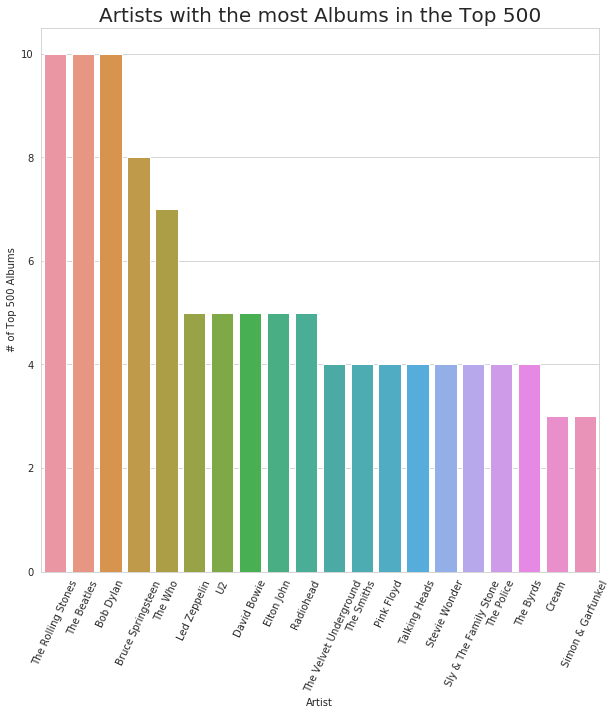

In [169]:
#TASK 4: Add a fourth cell that creates a plot
#Make a bar chart from the cleaned up dataframe defined above
df_art=df_art[:20]

fig = plt.figure(figsize = (10, 10))
sns.set_style("whitegrid")
ax = sns.barplot(x='Artist', y='# of Top 500 Albums', data=df_art)

plt.title('Artists with the most Albums in the Top 500', fontsize = 20)
plt.xlabel('Artist', fontsize = 10)
plt.setp(ax.get_xticklabels(), rotation=65)
plt.ylabel('# of Top 500 Albums', fontsize = 10)
plt.show()


## What are the top 20 Genres? 

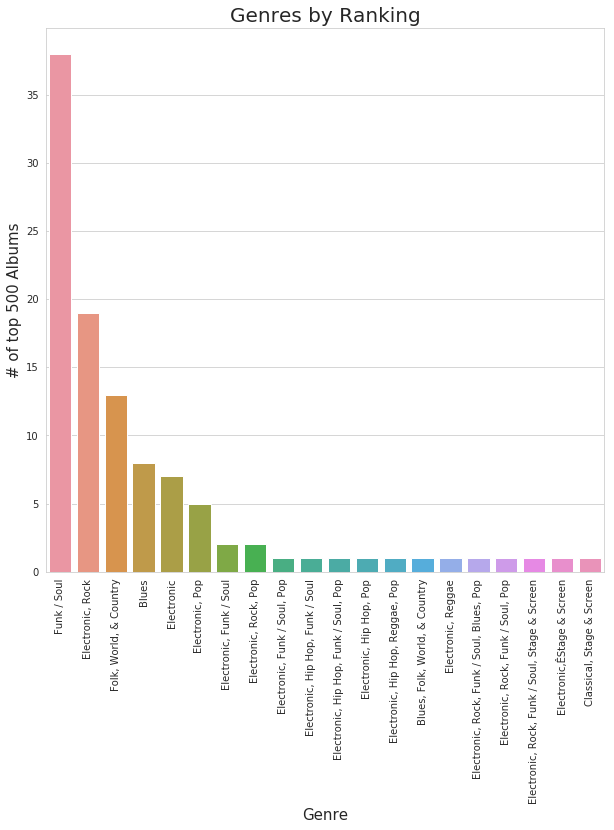

In [172]:
#Source: https://data36.com/pandas-tutorial-2-aggregation-and-grouping/
genre_grouped=df.groupby('Genre')
genres=genre_grouped.size()
df_genre=pd.DataFrame({'Genre': genres.index, '# of top 500 Albums': genres.values})

df_genre=df_genre[:20]
df_genre=df_genre.sort_values('# of top 500 Albums', ascending=False)

fig = plt.figure(figsize = (10, 10))
sns.set_style("whitegrid")
ax = sns.barplot(x='Genre', y='# of top 500 Albums', data=df_genre)

plt.title('Genres by Ranking', fontsize = 20)
plt.xlabel('Genre', fontsize = 15)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.ylabel('# of top 500 Albums', fontsize = 15)
plt.show()

## Pie Chart by Genre 

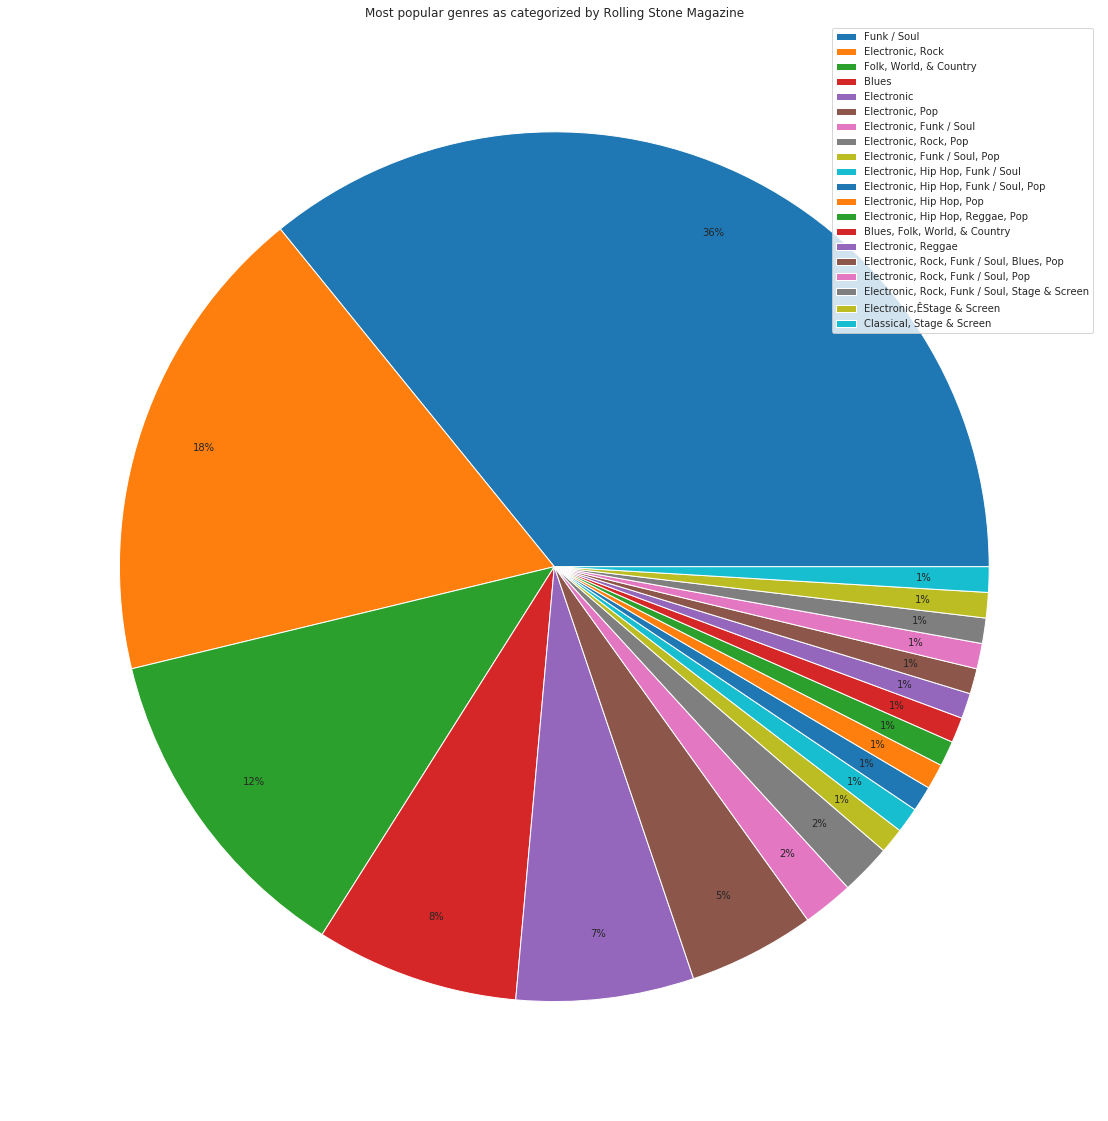

In [185]:
#Source 1: https://stackoverflow.com/questions/30059862/pandas-pie-chart-plot-remove-the-label-text-on-the-

fig = plt.figure(figsize=(20, 20))

plt.pie(df_genre['# of top 500 Albums'], autopct='%1.0f%%', pctdistance=0.85,)
plt.title('Most popular genres as categorized by Rolling Stone Magazine')
plt.legend(df_genre['Genre'], loc='best')
plt.show()


## Convert to Numpy Array 

In [207]:
#TASK 5: Extract the data from the pandas datafram into a numpy array. (FAILED)
df = df.values

AttributeError: 'property' object has no attribute 'values'

In [ ]:
##I could not get this part to work, IDK if its another encoding thing, but I tried all the reccomendations on stack overflow:
#Source: https://stackoverflow.com/questions/17241004/how-do-i-get-a-dataframe-index-series-column-as-an-array-or-list
#https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array/54508052#54508052

#1. I was trying to convert my pandas dataframe to a numpy array using the .values attribute of numpy. 
#2. I tried using to_numpy() Method / df.index.values / etc
#3. I thought I could convert my pandas dataframe into an numpy array eventhough it containted non-numiercal values
#4. I keep getting an error: I think its becuase numpy doesn't accept OBJECTS and most of my data is non-numerical
#4. and was kept this way that so I could have the artist names and genres in my analysis. 
#5. Searched Stackoverflow / Texted paxton / Asked a friend from DALI lab (Kaitlyn Hahn)
#6. 2 hours

In [ ]:
#TASK 6: Carry out some kind of basic analysis or data viz of the numpy array (FAILED)
#Can't use numpy's viz functions until we can get the array loaded in properly. 